In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


df = pd.read_csv("base_proyecto.csv", sep = ",", index_col=0)

In [ ]:

#volvemos matrices los datos que sacamos del dataset
""" 
aux_EDAD = np.array(df["grupos_de_edad"]).reshape(9450, 1)
aux_ingresos = np.array(df["ingresos"]).reshape(9450, 1)
aux_estudios = np.array(df["nivel_de_estudios"]).reshape(9450, 1)
"""
#construyo la matiz x
X_generador = df.iloc[:,[2,4]]

#construyo el vector Y
y_generador = df.iloc[:,1]

X, x_descartado, y, y_descartado = train_test_split( X_generador,y_generador, test_size = 0.95, random_state = 0)         

h = 0.2 
c = 1.0

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [52]:
x_entrenador, x_provador, y_entrenador, y_provador = train_test_split( X,y, test_size = 0.40, random_state = 0) 


# CVR CON regresión lineal

In [53]:
#svm LINEAL 
lineal_svc = SVC(kernel= "linear", C=c)
#entrenamos el modelo
lineal_svc.fit(x_entrenador,y_entrenador)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [54]:
y_predecida = lineal_svc.predict(x_provador)
print("Precisión:", accuracy_score(y_provador, y_predecida))


Precisión: 0.5714285714285714


In [70]:
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred = lineal_svc.predict(X_range)
plt.scatter(x_entrenador, y_entrenador, alpha=0.3, label="Datos reales")
plt.plot(X_range, y_pred, color="red", linewidth=2, label="Regresión SVM (lineal)")
plt.xlabel("Ingresos")
plt.ylabel("Pobreza (0/1 o valor continuo)")
plt.legend()
plt.show()


c:\Users\lisse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but SVC is expecting 2 features as input.

In [ ]:
scores = cross_val_score(lineal_svc, x_provador, y_provador, cv=5)
scores
print("%0.6f Exactitud con desviación estandar de %0.6f" % (scores.mean(), scores.std()))

0.613514 Exactitud con desviación estandar de 0.044907


In [56]:

scores = cross_val_score(lineal_svc, x_entrenador, y_entrenador, cv=5, scoring='f1_macro')
scores
print("%0.2f Exactitud con desviación estandar de %0.2f" % (scores.mean(), scores.std()))

0.31 Exactitud con desviación estandar de 0.03


# CVR Regresion RBF GAUSSIANO

In [57]:
rbf_svc = SVC(kernel= "rbf", C=c, gamma=0.7)
#entrenamos el modelo
rbf_svc.fit(x_entrenador,y_entrenador)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.7
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [58]:
y_predecida = rbf_svc.predict(x_provador)
print("Precisión:", accuracy_score(y_provador, y_predecida))

Precisión: 0.544973544973545


In [59]:
scores = cross_val_score(rbf_svc, x_provador, y_provador, cv=5)
scores
print("%0.2f Exactitud con desviación estandar de %0.2f" % (scores.mean(), scores.std()))

0.61 Exactitud con desviación estandar de 0.04


In [60]:
scores = cross_val_score(rbf_svc, X, y, cv=5, scoring='f1_macro')
scores
print("%0.2f Exactitud con desviación estandar de %0.2f" % (scores.mean(), scores.std()))

0.33 Exactitud con desviación estandar de 0.03


# CVR Con neurona(Perceptron) 

In [61]:
perceptron_clf = MLPClassifier(solver='lbfgs', alpha=1,hidden_layer_sizes=(5, 2))
#entrenamos el modelo
perceptron_clf.fit(x_entrenador,y_entrenador)


c:\Users\lisse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 1 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,hidden_layer_sizes,"(5, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,1
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [62]:
perceptron_clf.score(x_provador, y_provador)
print("Precisión:", accuracy_score(y_provador, y_predecida))

Precisión: 0.544973544973545


In [63]:

scores = cross_val_score(perceptron_clf, x_provador, y_provador, cv=5)
scores
print("%0.6f Exactitud con desviación estandar de %0.6f" % (scores.mean(), scores.std()))

0.587482 Exactitud con desviación estandar de 0.023841


In [64]:
scores = cross_val_score(perceptron_clf, x_provador, y_provador, cv=5, scoring='f1_macro')
scores
print("%0.6f Exactitud con desviación estandar de %0.6f" % (scores.mean(), scores.std()))

0.293480 Exactitud con desviación estandar de 0.118735


c:\Users\lisse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NameError: name 'cv_results' is not defined

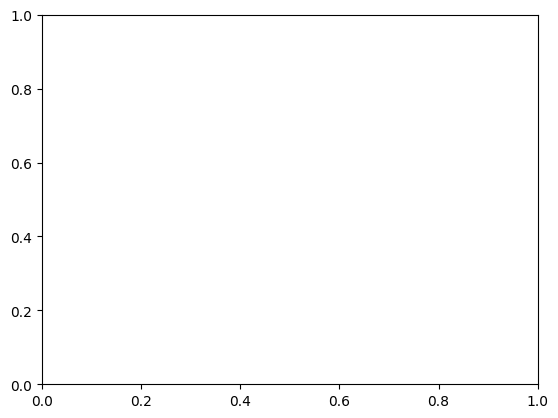

In [71]:
fig, ax = plt.subplots()
ax.boxplot(
    [cv_results["SVM Linear"]["test_f1_macro"],
     cv_results["SVM RBF"]["test_f1_macro"],
     cv_results["MLP"]["test_f1_macro"]],
    labels=["SVM Linear", "SVM RBF", "MLP"]
)
ax.set_title("Distribución F1-macro por fold (CV=5)")
ax.set_ylabel("F1-macro")
plt.show()